In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# 1. Subset Selection and Simulations

1. Code:

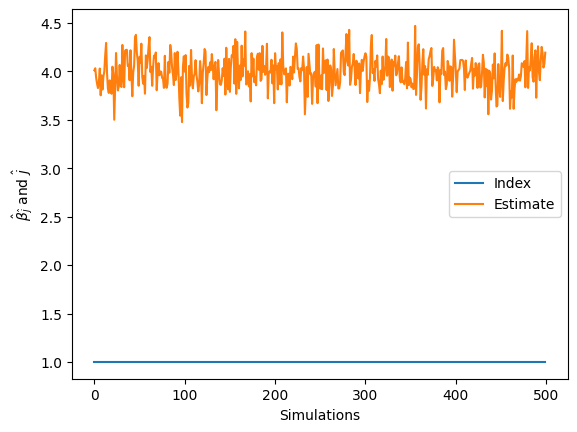

In [13]:
N = 500
beta = np.array([[4],[2],[2],[2]])
rng = np.random.default_rng()
beta_hat = []
for i in range(500):
    X = rng.normal(0, 1, (N, 4))
    U = rng.normal(0, 2, (N, 1))
    Y = X @ beta + U
    R = 0
    ix = 0
    beta_i = 0
    for i in range(4):
        reg = sp.stats.linregress(X[:, i], Y[:, 0])
        if (reg.rvalue > R):
            R = reg.rvalue
            ix = i 
            beta_i = reg.slope
    beta_hat.append([ix + 1, beta_i])
beta_hat = np.array(beta_hat)
plt.ylabel(r"$\hat{\beta}_{\hat{j}}$ and $\hat{j}$")
plt.xlabel("Simulations")
plt.plot(beta_hat[:, 0], label = "Index")
plt.plot(beta_hat[:,1], label = "Estimate")
plt.legend()
plt.show()

2. The trick applied in class, namely utilizing the standardized OLS coefficients, and simply comparing magnitudes does work here. In this case, there is no deleterious impact of considering standardized OLS coefficients, since, by design, each of the $x_{i}$'s have the same variance. Additionally, since this is just a toy example, and we are simply trying to observe the relationships between the $\beta_i$'s, and not attempting causal inference on the features, we face no problem again. 
However, it is not super important, since the features being orthogonal by design already lends itself to standardized regression coefficients. 

3. In every single simulation, the researcher is able to identify the most relevant regressor. This is not surprising, since, by desgin, the features are all orthogonal. As a result, we are very easily able to identify the most significant covariate.

4. Code:

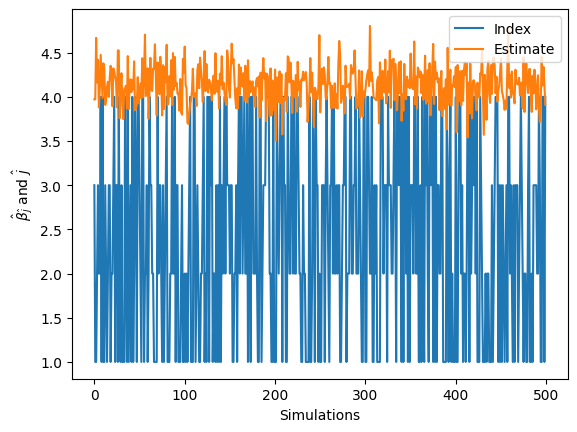

The proportion that the researcher correctly identifies is 0.302


In [14]:
beta_hat = []
gamma = 0.5
cov = np.array([[1, 0, 0, 0],
       [0, 1, gamma, gamma],
       [0, gamma, 1, gamma],
       [0, gamma, gamma, 1]])
for i in range(500):
    X = rng.multivariate_normal(np.zeros(4), cov=cov, size = (N, ))
    U = rng.normal(0, 2, (N, 1))
    Y = X @ beta + U
    R = 0
    j_hat = 0
    beta_j = 0
    for j in range(4):
        reg = sp.stats.linregress(X[:,j], Y[:, 0])
        if (reg.rvalue >= R):
            j_hat = j 
            beta_j = reg.slope
            R = reg.rvalue
    beta_hat.append([j_hat + 1, beta_j])
beta_hat = np.array(beta_hat)
plt.ylabel(r"$\hat{\beta}_{\hat{j}}$ and $\hat{j}$")
plt.xlabel("Simulations")
plt.plot(beta_hat[:, 0], label = "Index")
plt.plot(beta_hat[:,1], label = "Estimate")
plt.legend()
plt.show()
print(f"The proportion that the researcher correctly identifies is {np.mean(beta_hat[:, 0] == np.full((N,), 1))}")

5. The researcher is able to identify the most relevant regressor approximately $\frac13$ of the time. Considering the features are very much not orthogonal now, this is not surprising.

6. This is directly related to omitted variable bias because there are covariates excluded from the model that have non-zero effect on the outcome, and are correlated with the covariates in the model. 

7. Code:

In [15]:
def simulation(gamma):
    beta_hat = []
    cov = np.array([[1, 0, 0, 0],
        [0, 1, gamma, gamma],
        [0, gamma, 1, gamma],
        [0, gamma, gamma, 1]])
    for _ in range(500):
        X = rng.multivariate_normal(np.zeros(4), cov=cov, size = (N, ))
        U = rng.normal(0, 2, (N, 1))
        Y = X @ beta + U
        R = 0
        j_hat = 0
        beta_j = 0
        for j in range(4):
            reg = sp.stats.linregress(X[:,j], Y[:, 0])
            if (reg.rvalue > R):
                j_hat = j
                beta_j = reg.slope
                R = reg.rvalue
        beta_hat.append([j_hat + 1, beta_j])
    beta_hat = np.array(beta_hat)
    return [gamma, np.mean(beta_hat[:, 0] == np.full((N,), 1))]


The following are the results of running a few choices of gamma:

C:\Users\matth\AppData\Local\Temp\ipykernel_1804\2683143143.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = rng.multivariate_normal(np.zeros(4), cov=cov, size = (N, ))


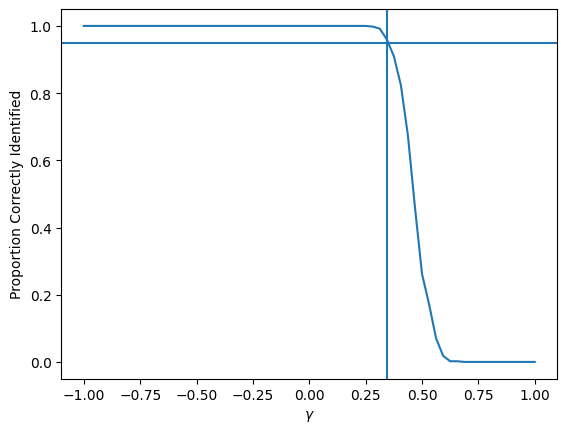

In [16]:
res = []
for gamma in np.linspace(-1, 1, 65):
    res.append(simulation(gamma))
res = np.array(res)
plt.plot(res[:, 0], res[:, 1])
res = res[res[:, 1] > 0.95]
gamma = np.max(res, axis= 0)
plt.axhline(y = 0.95)
plt.axvline(x = gamma[0])
plt.xlabel(r"$\gamma$")
plt.ylabel("Proportion Correctly Identified")
plt.show()

In [17]:

print(gamma[0])

0.34375


For values of $\gamma$ in $(0, 0.34375)$, we select the most significant $\beta$ at least $0.95$ of the time.

8. Code:

In [18]:
def simulation(gamma, beta_1, N, num_sim):
    beta = [[beta_1], [2], [2], [2]]
    beta_hat = []
    cov = np.array([[1, 0, 0, 0],
        [0, 1, gamma, gamma],
        [0, gamma, 1, gamma],
        [0, gamma, gamma, 1]])
    for _ in range(num_sim):
        X = rng.multivariate_normal(np.zeros(4), cov=cov, size = (N, ))
        U = rng.normal(0, 2, (N, 1))
        Y = X @ beta + U
        R = 0
        j_hat = 0
        beta_j = 0
        for j in range(4):
            reg = sp.stats.linregress(X[:,j], Y[:, 0])
            if (reg.rvalue > R):
                j_hat = j
                beta_j = reg.slope
                R = reg.rvalue
        beta_hat.append([j_hat + 1, beta_j])
    beta_hat = np.array(beta_hat)
    return [beta_1, gamma, np.mean(beta_hat[:, 0] == np.full((num_sim,), 1))]

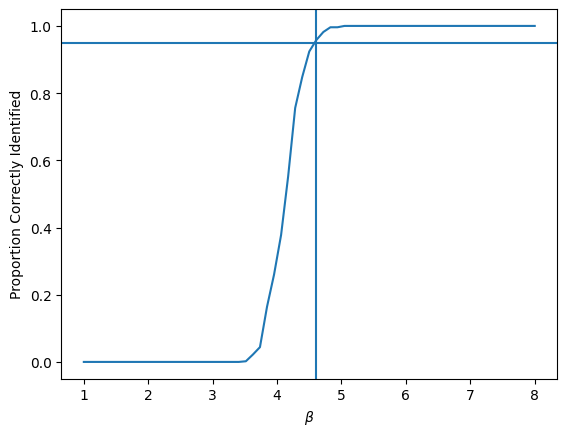

In [21]:
res = []
for beta in np.linspace(1, 8, 65):
    res.append(simulation(1/2, beta, 500, 500))
res = np.array(res)
plt.plot(res[:, 0], res[:, 2])
beta = np.min(res[res[:, 2] > 0.95], axis= 0)[0]
plt.axhline(y = 0.95)
plt.axvline(x = beta)
plt.xlabel(r"$\beta$")
plt.ylabel("Proportion Correctly Identified")
plt.show()


In [23]:
print(f"The threshold of beta_1 is {beta}")

The threshold of beta_1 is 4.609375


Side Note: these curves look logistic. Here's some code to analyze this.

In [24]:
beta_res = []
for beta in np.linspace(1, 8, 65):
    sim_res = simulation(1/2, beta, 500, 500)
    beta_res.append([sim_res[0], sim_res[2]])
gamma_res = []
for gamma in np.linspace(-1/3, 1, 65):
    sim_res = simulation(gamma, 4, 500, 500)
    gamma_res.append([sim_res[1], sim_res[2]])
beta_res = np.array(beta_res)
gamma_res = np.array(gamma_res)
def logifunc(x,A,x0,k):
    return A / (1 + np.exp(-k*(x-x0)))
gamma_param, gamma_cov = sp.optimize.curve_fit(logifunc, gamma_res[:, 0], gamma_res[:, 1])
beta_param, beta_cov = sp.optimize.curve_fit(logifunc, beta_res[:, 0], beta_res[:, 1])


The best fit logistic function for gamma is: 
 A = 1.0014851104564708, x0 = 0.4678934046299783, k = -25.07689491085193
99% confidence intervals: 
[[  0.99835942   1.0046108 ]
 [  0.46659315   0.46919365]
 [-25.79014223 -24.36364759]]
The best fit logistic function for beta is: 
 A = 1.0007931910542014, x0 = 4.1366860044946145, k = 6.302759627864724
99% confidence intervals: 
[[0.99788885 1.00369753]
 [4.13133246 4.14203955]
 [6.11691148 6.48860778]]


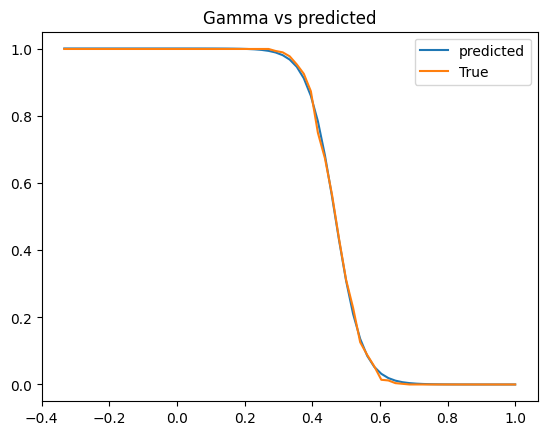

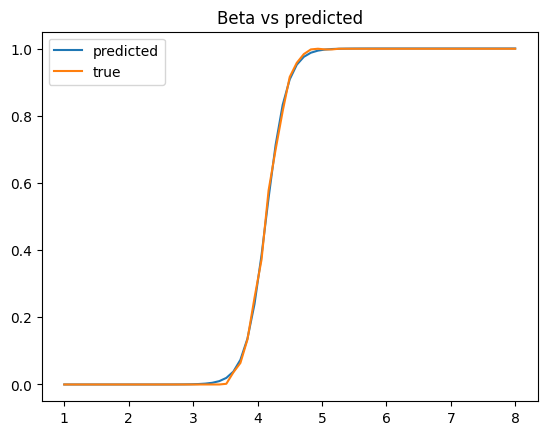

In [25]:
gamma_param, gamma_cov = sp.optimize.curve_fit(logifunc, gamma_res[:, 0], gamma_res[:, 1])
beta_param, beta_cov = sp.optimize.curve_fit(logifunc, beta_res[:, 0], beta_res[:, 1])
plt.figure()
plt.plot(gamma_res[:, 0], logifunc(gamma_res[:, 0], *gamma_param), label = "predicted")
plt.plot(gamma_res[:, 0], gamma_res[:, 1], label = "True")
gamma_stderr = np.sqrt(np.diag(gamma_cov))
gamma_cis = np.vstack((gamma_param - 2.576 * gamma_stderr, gamma_param + 2.576 * gamma_stderr)).T 
print(f"The best fit logistic function for gamma is: \n A = {gamma_param[0]}, x0 = {gamma_param[1]}, k = {gamma_param[2]}")
print(f"99% confidence intervals: \n{gamma_cis}")
plt.legend()
plt.title("Gamma vs predicted")
plt.figure()
plt.plot(beta_res[:, 0], logifunc(beta_res[:, 0], *beta_param), label = "predicted")
plt.plot(beta_res[:, 0], beta_res[:, 1], label = "true")
plt.legend()
beta_stderr = np.sqrt(np.diag(beta_cov))
beta_cis = np.vstack((beta_param - 2.576 * beta_stderr, beta_param + 2.576 * beta_stderr)).T
print(f"The best fit logistic function for beta is: \n A = {beta_param[0]}, x0 = {beta_param[1]}, k = {beta_param[2]}")
print(f"99% confidence intervals: \n{beta_cis}")
plt.title("Beta vs predicted")
plt.show()


Whether subset selection works or not seems to follow an asymptotically logistic distribution, for both $\beta$ and $\gamma$. 

# 2 Subset selection and data: growth regressions

1. Imports:

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.linear_model import LinearRegression

Read data

In [27]:
data = pd.read_excel("millions.xls", "BARROSHO", index_col= "code", na_values=".")
labels = pd.read_excel("millions.XLS", "Variable code", index_col="#")

In [28]:
data.head()

,#,country,gamma,X1,X2,X3,X4,X5,X6,X7,...,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62
code,,,,,,,,,,,,,,,,,,,,,
DZA,1,Algeria,0.013690,7.438972,47.299999,0.46,0,0,0.131,186.555466,...,0.0,0.0,0.005,0.99,0.005,2855.520020,0.196,0.0,0.836,0.0
AGO,2,Angola,0.000569,6.786717,NaN,0.21,1,0,0.281,239.605362,...,0.0,0.0,0.000,0.00,0.150,2319.385498,0.268,0.0,0.000,0.0
BEN,3,Benin,-0.006586,7.019297,38.900002,0.27,1,0,0.050,4.489583,...,0.0,0.0,0.000,0.15,0.080,1372.623291,0.009,0.0,0.000,0.0
BWA,4,Botswana,0.056195,6.284134,45.700001,0.42,1,0,0.072,23.388475,...,0.0,0.0,0.000,0.00,0.250,210.918488,0.533,5.0,0.000,0.0
HVO,5,Burkina Faso,0.004206,6.152733,36.299999,0.08,1,0,0.050,4.489583,...,0.0,0.0,0.000,0.25,0.000,NaN,0.001,1.0,0.000,0.0


In [29]:
data.drop(["#", "country"], axis = 1, inplace = True)

In [30]:
print(data.head())
print(labels.head())

         gamma        X1         X2    X3  X4  X5     X6          X7      X8  \
code                                                                           
DZA   0.013690  7.438972  47.299999  0.46   0   0  0.131  186.555466  21.069   
AGO   0.000569  6.786717        NaN  0.21   1   0  0.281  239.605362     NaN   
BEN  -0.006586  7.019297  38.900002  0.27   1   0  0.050    4.489583     NaN   
BWA   0.056195  6.284134  45.700001  0.42   1   0  0.072   23.388475     NaN   
HVO   0.004206  6.152733  36.299999  0.08   1   0  0.050    4.489583     NaN   

          X9  ...  X53  X54    X55   X56    X57          X58    X59  X60  \
code          ...                                                          
DZA   13.303  ...  0.0  0.0  0.005  0.99  0.005  2855.520020  0.196  0.0   
AGO      NaN  ...  0.0  0.0  0.000  0.00  0.150  2319.385498  0.268  0.0   
BEN      NaN  ...  0.0  0.0  0.000  0.15  0.080  1372.623291  0.009  0.0   
BWA      NaN  ...  0.0  0.0  0.000  0.00  0.250   210.91848

Implement subset selection

In [31]:
R = 0
j_hat = None
beta_j = None
for xi in data.columns[1:]:
    reg_df = data.loc[:, ["gamma", xi]].dropna()
    res = sp.stats.linregress(reg_df[xi], reg_df["gamma"])
    if (res.rvalue > R):
        R = res.rvalue
        j_hat = xi 
        beta_j = res.slope
print(f"The variable chosen is {labels.loc[j_hat, 'Var Name']}. Its coefficient is {beta_j} and its R^2 is {R ** 2}")

The variable chosen is  EQINV. Its coefficient is 0.35313560484865114 and its R^2 is 0.43268825547604167


As we can see, subset selection returns the covariate EQINV, which corresponds to equipment investment. 

2. We cannot use the same trick to simplify the comparison of $R^2$, since our covariates are not orthogonal. Even if we standardized our features, they would still have positive covariance. 

3. We implement a greedy algorithm, where we find the best covariate, then add the next best covariate. Although this is not theoretically optimal (in fact, there is always a sequence of covariates that the greedy algorithm would add to our list, but gives the worst $R^2$), it is usually effective in practice.

4. Code implementation of 2.3

In [32]:
def greedy_ss(data, s = 2):
    R = 0
    j_hat = []
    beta_j = []
    cols = list(range(1, len(data.columns)))
    num_regs = 0
    while (len(j_hat) < s):
        # assume outcome is in column 0
        R_t = 0
        j_hat_t = 0
        beta_j_t = 0
        #select next best xi
        for xi in cols:
            num_regs += 1
            l = [0, xi] + j_hat
            reg_df = data.iloc[:,l].dropna()
            X = reg_df.iloc[:, 1:]
            y = reg_df.iloc[:, :1]
            reg = LinearRegression().fit(X,y)
            R2 = reg.score(X, y)
            if (R2 > R_t):
                R_t = R2
                j_hat_t = xi 
                beta_j_t = reg.coef_
        if (R_t > R):
            R = R_t 
            j_hat.append(j_hat_t)
            beta_j = beta_j_t
            cols.remove(j_hat_t)
        else:
            break
    return (j_hat, beta_j, R, num_regs)


Run function

In [33]:
j_hat, beta_j, R, num_regs = greedy_ss(data, 2)

In [34]:
print(f"The best indices we observed with {num_regs} regressions were:\n {labels.loc[data.columns[j_hat], 'Var Name'].values} \nwith values\n {beta_j} \nand R^2: \n{R}")

The best indices we observed with 121 regressions were:
 [' EQINV' ' CONFUC'] 
with values
 [[0.08781327 0.31485877]] 
and R^2: 
0.5790821694783819


The variables we managed to select were Equipment Investment and proportion of your country confucian.

5. The first variable we selected, Equipment Investment, makes intuitive sense. That seems like the most reliable and consistent way to encourage long term growth. However, the second variable does not make intuitive sense. There is an argument to make for the culture of Confucianism contributing to economic growth, it doesn't really mesh with our knowledge of the world that it is the second most impactful variable. I would not claim these are the variables that matter most. We would need to make the very strong assumption that there is no omitted variable bias, which would imply that the regression is causal. 

6. If we were to make the very strong, and probably not true assumption, that there is no omitted variable bias with this regression, then we would be able to claim that this regression is causal. 